In [45]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import gmaps
from scipy.stats import linregress
from pprint import pprint
import os
from config import g_key
import gmaps.datasets
from ipywidgets.embed import embed_minimal_html


gmaps.configure(api_key=g_key)

plt.style.use("fivethirtyeight")

# Hide warning messages in notebook
import warnings
warnings.filterwarnings('ignore')

In [2]:

# File to Load 
zillow = "Zip_Residential_Zillow_.csv"

_
# Read the Zillow csv with Zip Codes and Medians price per Sq foot. (from 1996 to 2019)
zillow_df = pd.read_csv(zillow, encoding="utf-8")


zillow_df.head()

,RegionID,RegionName,City,State,Metro,CountyName,SizeRank,1996-04,1996-05,1996-06,...,2018-11,2018-12,2019-01,2019-02,2019-03,2019-04,2019-05,2019-06,2019-07,2019-08
0,61639,10025,New York,NY,New York-Newark-Jersey City,New York County,1,200.0,200.0,201.0,...,1316,1304,1291,1289,1288,1275,1261,1256,1247,1240
1,84654,60657,Chicago,IL,Chicago-Naperville-Elgin,Cook County,2,156.0,157.0,157.0,...,478,479,481,483,488,493,493,488,481,477
2,61637,10023,New York,NY,New York-Newark-Jersey City,New York County,3,359.0,359.0,359.0,...,1582,1571,1557,1542,1522,1500,1488,1487,1478,1469
3,91982,77494,Katy,TX,Houston-The Woodlands-Sugar Land,Harris County,4,67.0,68.0,68.0,...,113,114,114,114,114,114,114,114,113,112
4,84616,60614,Chicago,IL,Chicago-Naperville-Elgin,Cook County,5,199.0,200.0,201.0,...,525,527,529,532,534,534,531,523,515,509


In [3]:
zip = "Zip_Lag_Lng.csv"
zip_df = pd.read_csv(zip)
zip_df.head()

,Zip,City,State,Latitude,Longitude,Timezone,Daylight savings time flag,geopoint
0,71937,Cove,AR,34.398483,-94.39398,-6,1,"34.398483, -94.39398"
1,72044,Edgemont,AR,35.624351,-92.16056,-6,1,"35.624351, -92.16056"
2,56171,Sherburn,MN,43.660847,-94.74357,-6,1,"43.660847, -94.74357"
3,49430,Lamont,MI,43.010337,-85.89754,-5,1,"43.010337, -85.89754"
4,52585,Richland,IA,41.194129,-91.98027,-6,1,"41.194129, -91.98027"


In [4]:

# Format the Data Frame and check the NJ state for consistency
zillow_df = zillow_df.rename(columns ={"RegionName" : "zip_code"})
# zillow_df["zip_code"] = zillow_df.zip_code.map("{:05}".format)
zillow_df = zillow_df.fillna(0)
checknj = zillow_df[(zillow_df["State"] == "NJ")]

checknj

,RegionID,zip_code,City,State,Metro,CountyName,SizeRank,1996-04,1996-05,1996-06,...,2018-11,2018-12,2019-01,2019-02,2019-03,2019-04,2019-05,2019-06,2019-07,2019-08
63,60545,7030,Hoboken,NJ,New York-Newark-Jersey City,Hudson County,64,158.0,158.0,158.0,...,728,727,727,727,727,726,723,720,718,718
79,61148,8701,Lakewood,NJ,New York-Newark-Jersey City,Ocean County,80,60.0,60.0,60.0,...,164,165,165,165,165,165,165,166,166,166
172,60639,7302,Jersey City,NJ,New York-Newark-Jersey City,Hudson County,173,113.0,114.0,114.0,...,801,800,795,790,788,785,780,776,776,775
186,61169,8753,Toms River,NJ,New York-Newark-Jersey City,Ocean County,187,74.0,74.0,74.0,...,165,165,165,165,165,163,163,164,165,165
212,60518,7002,Bayonne,NJ,New York-Newark-Jersey City,Hudson County,213,76.0,76.0,76.0,...,203,203,204,204,205,208,209,209,209,209
238,60599,7093,West New York,NJ,New York-Newark-Jersey City,Hudson County,239,82.0,81.0,81.0,...,288,291,293,293,294,296,298,299,300,302
282,61200,8831,Monroe,NJ,New York-Newark-Jersey City,Middlesex County,283,95.0,95.0,94.0,...,187,188,190,191,191,191,191,189,189,188
334,60594,7087,Union City,NJ,New York-Newark-Jersey City,Hudson County,335,60.0,60.0,60.0,...,266,268,269,269,269,265,260,259,260,261
541,60560,7047,North Bergen,NJ,New York-Newark-Jersey City,Hudson County,542,73.0,73.0,74.0,...,237,239,240,241,243,243,242,242,243,245
545,61175,8759,Manchester,NJ,New York-Newark-Jersey City,Ocean County,546,65.0,65.0,65.0,...,116,116,116,116,116,115,114,114,114,114


In [5]:
# getting column names

columns = list(zillow_df.columns.values)
print(len(columns))
columns

288


['RegionID',
 'zip_code',
 'City',
 'State',
 'Metro',
 'CountyName',
 'SizeRank',
 '1996-04',
 '1996-05',
 '1996-06',
 '1996-07',
 '1996-08',
 '1996-09',
 '1996-10',
 '1996-11',
 '1996-12',
 '1997-01',
 '1997-02',
 '1997-03',
 '1997-04',
 '1997-05',
 '1997-06',
 '1997-07',
 '1997-08',
 '1997-09',
 '1997-10',
 '1997-11',
 '1997-12',
 '1998-01',
 '1998-02',
 '1998-03',
 '1998-04',
 '1998-05',
 '1998-06',
 '1998-07',
 '1998-08',
 '1998-09',
 '1998-10',
 '1998-11',
 '1998-12',
 '1999-01',
 '1999-02',
 '1999-03',
 '1999-04',
 '1999-05',
 '1999-06',
 '1999-07',
 '1999-08',
 '1999-09',
 '1999-10',
 '1999-11',
 '1999-12',
 '2000-01',
 '2000-02',
 '2000-03',
 '2000-04',
 '2000-05',
 '2000-06',
 '2000-07',
 '2000-08',
 '2000-09',
 '2000-10',
 '2000-11',
 '2000-12',
 '2001-01',
 '2001-02',
 '2001-03',
 '2001-04',
 '2001-05',
 '2001-06',
 '2001-07',
 '2001-08',
 '2001-09',
 '2001-10',
 '2001-11',
 '2001-12',
 '2002-01',
 '2002-02',
 '2002-03',
 '2002-04',
 '2002-05',
 '2002-06',
 '2002-07',
 '200

In [6]:
zillow_df.head()

,RegionID,zip_code,City,State,Metro,CountyName,SizeRank,1996-04,1996-05,1996-06,...,2018-11,2018-12,2019-01,2019-02,2019-03,2019-04,2019-05,2019-06,2019-07,2019-08
0,61639,10025,New York,NY,New York-Newark-Jersey City,New York County,1,200.0,200.0,201.0,...,1316,1304,1291,1289,1288,1275,1261,1256,1247,1240
1,84654,60657,Chicago,IL,Chicago-Naperville-Elgin,Cook County,2,156.0,157.0,157.0,...,478,479,481,483,488,493,493,488,481,477
2,61637,10023,New York,NY,New York-Newark-Jersey City,New York County,3,359.0,359.0,359.0,...,1582,1571,1557,1542,1522,1500,1488,1487,1478,1469
3,91982,77494,Katy,TX,Houston-The Woodlands-Sugar Land,Harris County,4,67.0,68.0,68.0,...,113,114,114,114,114,114,114,114,113,112
4,84616,60614,Chicago,IL,Chicago-Naperville-Elgin,Cook County,5,199.0,200.0,201.0,...,525,527,529,532,534,534,531,523,515,509


In [7]:
columns.remove('RegionID')
columns.remove('zip_code')
columns.remove('City')
columns.remove('State')
columns.remove('Metro')
columns.remove('CountyName')
columns.remove('SizeRank')
columns

['1996-04',
 '1996-05',
 '1996-06',
 '1996-07',
 '1996-08',
 '1996-09',
 '1996-10',
 '1996-11',
 '1996-12',
 '1997-01',
 '1997-02',
 '1997-03',
 '1997-04',
 '1997-05',
 '1997-06',
 '1997-07',
 '1997-08',
 '1997-09',
 '1997-10',
 '1997-11',
 '1997-12',
 '1998-01',
 '1998-02',
 '1998-03',
 '1998-04',
 '1998-05',
 '1998-06',
 '1998-07',
 '1998-08',
 '1998-09',
 '1998-10',
 '1998-11',
 '1998-12',
 '1999-01',
 '1999-02',
 '1999-03',
 '1999-04',
 '1999-05',
 '1999-06',
 '1999-07',
 '1999-08',
 '1999-09',
 '1999-10',
 '1999-11',
 '1999-12',
 '2000-01',
 '2000-02',
 '2000-03',
 '2000-04',
 '2000-05',
 '2000-06',
 '2000-07',
 '2000-08',
 '2000-09',
 '2000-10',
 '2000-11',
 '2000-12',
 '2001-01',
 '2001-02',
 '2001-03',
 '2001-04',
 '2001-05',
 '2001-06',
 '2001-07',
 '2001-08',
 '2001-09',
 '2001-10',
 '2001-11',
 '2001-12',
 '2002-01',
 '2002-02',
 '2002-03',
 '2002-04',
 '2002-05',
 '2002-06',
 '2002-07',
 '2002-08',
 '2002-09',
 '2002-10',
 '2002-11',
 '2002-12',
 '2003-01',
 '2003-02',
 '20

In [8]:
# Iterations through rows and columns

x = {}
for i, r in zillow_df.iloc[1:].iterrows():
    x[zillow_df.iloc[i,1]] = []
    for j in range (7, 288):
        if zillow_df.iloc[i,j] != 0:
            vcalc = (zillow_df.iloc[i,287]/zillow_df.iloc[i,j])*100
            x[zillow_df.iloc[i,1]].append(vcalc)
            break  
        else: None
            
        
        
            
x

{60657: [305.7692307692308],
 10023: [409.1922005571031],
 77494: [167.1641791044776],
 60614: [255.7788944723618],
 77449: [197.9591836734694],
 79936: [170.37037037037038],
 77084: [189.79591836734696],
 10002: [482.962962962963],
 10467: [332.5581395348837],
 11226: [621.0526315789474],
 60640: [352.13675213675214],
 94109: [431.7164179104478],
 10016: [417.8694158075602],
 78660: [189.85507246376812],
 37013: [211.11111111111111],
 32162: [285.48387096774195],
 11235: [436.0294117647059],
 11375: [453.2894736842105],
 60647: [355.3191489361702],
 90250: [427.11864406779665],
 37211: [261.2903225806451],
 10029: [390.4166666666667],
 10009: [490.2985074626866],
 77573: [196.55172413793102],
 60618: [300.0],
 78130: [202.8985507246377],
 77584: [203.70370370370372],
 10011: [569.7183098591549],
 10128: [430.9352517985611],
 28269: [169.11764705882354],
 20002: [693.5064935064935],
 78613: [181.8181818181818],
 78572: [148.0769230769231],
 30349: [153.84615384615387],
 79912: [166.666

In [10]:

percent_df = pd.DataFrame.from_dict(x, orient="index")
#percent_df

percent_df.to_csv("percent2.csv", encoding='utf-8')

In [56]:
delta281 = percent_df.sort_values(by =[0], ascending=False)

Greatest10 = delta281.head(10)
Lowest10 = delta281.tail(10)

G10_df = pd.DataFrame(Greatest10)
L10_df = pd.DataFrame(Lowest10)

print(Greatest10)
print(Lowest10)

                 0
19146  1533.333333
11101  1050.000000
80449   927.272727
2128    874.000000
11238   863.025210
11221   849.295775
11976   839.669421
11249   829.054054
57033   808.333333
90291   804.571429
               0
29340  66.666667
66860  66.666667
62549  66.433566
35098  64.492754
22503  63.483146
67455  63.461538
29015  62.745098
35062  57.823129
62801  53.571429
31520  44.554455


In [13]:
#Created .csv's so that I can remove index make sure column headings are correct and call the file into a data set
#T10_df.to_csv("Top_10.csv")
#L10_df.to_csv("Lowest_10.csv")

In [14]:
# Seperate DataFrame for Top 10, in case needed for seperate measurements
T10_file = "Top_10.csv"

T10_df = pd.read_csv(T10_file)

T10_df.head(10)




,Zip,Price Deviation
0,19146,1533.333333
1,11101,1050.000000
2,80449,927.272727
3,2128,874.000000
4,11238,863.025210
5,11221,849.295775
6,11976,839.669421
7,11249,829.054054
8,57033,808.333333
9,90291,804.571429


In [30]:
L10_file = "Lowest_10.csv"

L10_df = pd.read_csv(L10_file)

L10_df.head(10)

,Zip,Price Deviation
0,29340,66.666667
1,66860,66.666667
2,62549,66.433566
3,35098,64.492754
4,22503,63.483146
5,67455,63.461538
6,29015,62.745098
7,35062,57.823129
8,62801,53.571429
9,31520,44.554455


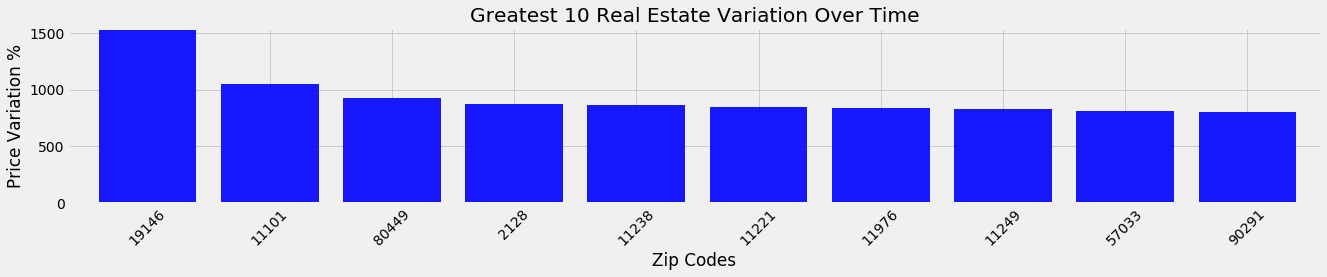

In [81]:
# Bar Chart for Top 10
# Set x_axis and ticks

x_axis = np.arange(len(Greatest10))
tick_locations = [value+0.4 for value in x_axis]


#plot using Lower 10 DataFrame
plt.figure(figsize=(20,3))
plt.bar(x_axis, G10_df[0], color='b', alpha=0.9, align="edge")
plt.xticks(tick_locations, G10_df.index, rotation="45")



#Set X and Y limits
plt.xlim(-0.25, len(x_axis))
plt.ylim(0, max(G10_df[0])+10)


#Create Title, X_label and Y_label
plt.title("Greatest 10 Real Estate Variation Over Time")
plt.xlabel("Zip Codes")
plt.ylabel("Price Variation %")


plt.show()




In [17]:
# x_axis = np.arange(len(Lowest10))
# tick_locations = [value+0.4 for value in x_axis]

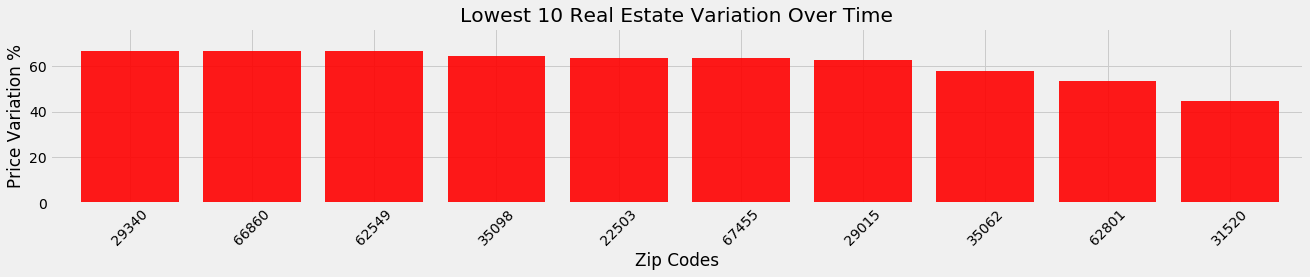

In [59]:
# Bar Chart for lower 10
# Set x_axis and ticks
x_axis = np.arange(len(Lowest10))
tick_locations = [value+0.4 for value in x_axis]


#plot using Lower 10 DataFrame
plt.figure(figsize=(20,3))
plt.bar(x_axis, L10_df[0], color='r', alpha=0.9, align="edge")
plt.xticks(tick_locations, L10_df.index, rotation="45")


#Set X and Y limits
plt.xlim(-0.25, len(x_axis))
plt.ylim(0, max(L10_df[0])+10)


#Create Title, X_label and Y_label
plt.title("Lowest 10 Real Estate Variation Over Time")
plt.xlabel("Zip Codes")
plt.ylabel("Price Variation %")

plt.show()


In [54]:
# Save file as Top10/lowest10 as csv.

# Saved as csv to clean header files
#df.to_csv("Top10Lowest10.csv")

In [20]:
# Call file saved, read the csv and create a DataFrame

file = "Top10Lowest10.csv"

T10L10 = pd.read_csv(file)

Top10Low10 = pd.DataFrame(T10L10)

#Verify Columns
Top10Low10.columns

Index(['Zip', 'Price Deviation'], dtype='object')

In [21]:
# Download csv of all avaiable US zip codes with lat and lng
# Use pd.read_csv to import file

zip_df.columns

Index(['Zip', 'City', 'State', 'Latitude', 'Longitude', 'Timezone',
       'Daylight savings time flag', 'geopoint'],
      dtype='object')

In [24]:
# Inner Merge Dataframe for gmaps to capture zipcode Lat and lng
new_merge = pd.merge(Top10Low10, zip_df, on="Zip", how="inner")

#Verify Merge was successful 
new_merge.head(30)

,Zip,Price Deviation,City,State,Latitude,Longitude,Timezone,Daylight savings time flag,geopoint
0,19146,1533.333333,Philadelphia,PA,39.938512,-75.180670,-5,1,"39.938512, -75.18067"
1,11101,1050.000000,Long Island City,NY,40.745341,-73.939070,-5,1,"40.745341, -73.93907"
2,80449,927.272727,Hartsel,CO,38.993175,-105.799160,-7,1,"38.993175, -105.79916"
3,2128,874.000000,Boston,MA,42.378297,-71.025500,-5,1,"42.378297, -71.0255"
4,11238,863.025210,Brooklyn,NY,40.680145,-73.962570,-5,1,"40.680145, -73.96257"
5,11221,849.295775,Brooklyn,NY,40.691234,-73.926370,-5,1,"40.691234, -73.92637"
6,11976,839.669421,Water Mill,NY,40.919693,-72.344070,-5,1,"40.919693, -72.34407"
7,11249,829.054054,Brooklyn,NY,40.645099,-73.945032,-5,1,"40.645099, -73.945032"
8,57033,808.333333,Hartford,SD,43.614888,-96.954630,-6,1,"43.614888, -96.95463"
9,90291,804.571429,Venice,CA,33.992411,-118.465310,-8,1,"33.992411, -118.46531"


In [46]:
#new_merge.to_csv("Top10Low10.csv")

In [25]:
#Clean/drop unecessary columns
Top10_Low10 = new_merge.drop(columns=['Timezone', 'Daylight savings time flag'])

#Verify DataFrame 
Top10_Low10.head(40)

,Zip,Price Deviation,City,State,Latitude,Longitude,geopoint
0,19146,1533.333333,Philadelphia,PA,39.938512,-75.180670,"39.938512, -75.18067"
1,11101,1050.000000,Long Island City,NY,40.745341,-73.939070,"40.745341, -73.93907"
2,80449,927.272727,Hartsel,CO,38.993175,-105.799160,"38.993175, -105.79916"
3,2128,874.000000,Boston,MA,42.378297,-71.025500,"42.378297, -71.0255"
4,11238,863.025210,Brooklyn,NY,40.680145,-73.962570,"40.680145, -73.96257"
5,11221,849.295775,Brooklyn,NY,40.691234,-73.926370,"40.691234, -73.92637"
6,11976,839.669421,Water Mill,NY,40.919693,-72.344070,"40.919693, -72.34407"
7,11249,829.054054,Brooklyn,NY,40.645099,-73.945032,"40.645099, -73.945032"
8,57033,808.333333,Hartford,SD,43.614888,-96.954630,"43.614888, -96.95463"
9,90291,804.571429,Venice,CA,33.992411,-118.465310,"33.992411, -118.46531"


In [26]:
# Create location Latitude and longitude for heatmap
locations = Top10_Low10[["Latitude", "Longitude"]]


#Verify Location DataFrame
locations.head(20)



,Latitude,Longitude
0,39.938512,-75.180670
1,40.745341,-73.939070
2,38.993175,-105.799160
3,42.378297,-71.025500
4,40.680145,-73.962570
5,40.691234,-73.926370
6,40.919693,-72.344070
7,40.645099,-73.945032
8,43.614888,-96.954630
9,33.992411,-118.465310


In [29]:
L10_df.head()

,0
29340,66.666667
66860,66.666667
62549,66.433566
35098,64.492754
22503,63.483146


In [61]:
Top10_Low10

,Zip,Price Deviation,City,State,Latitude,Longitude,geopoint
0,19146,1533.333333,Philadelphia,PA,39.938512,-75.180670,"39.938512, -75.18067"
1,11101,1050.000000,Long Island City,NY,40.745341,-73.939070,"40.745341, -73.93907"
2,80449,927.272727,Hartsel,CO,38.993175,-105.799160,"38.993175, -105.79916"
3,2128,874.000000,Boston,MA,42.378297,-71.025500,"42.378297, -71.0255"
4,11238,863.025210,Brooklyn,NY,40.680145,-73.962570,"40.680145, -73.96257"
5,11221,849.295775,Brooklyn,NY,40.691234,-73.926370,"40.691234, -73.92637"
6,11976,839.669421,Water Mill,NY,40.919693,-72.344070,"40.919693, -72.34407"
7,11249,829.054054,Brooklyn,NY,40.645099,-73.945032,"40.645099, -73.945032"
8,57033,808.333333,Hartford,SD,43.614888,-96.954630,"43.614888, -96.95463"
9,90291,804.571429,Venice,CA,33.992411,-118.465310,"33.992411, -118.46531"


In [32]:
# markers_locations = [
    
#     (39.938512, -75.18067),
#     (40.745341, -73.93907),
#     (38.993175, -105.79916),
#     (42.378297, -71.0255),
#     (40.680145, -73.9625),
#     (40.691234, -73.92637),
#     (40.919693, -72.34407),
#     (40.645099, -73.945032),
#     (43.614888, -96.95463),
#     (33.992411, -118.46531),
#     (35.03653, -81.62497),
#     (38.126728, -96.16635),
#     (39.777116, -88.87171),
#     (34.120006, -87.05075),
#     (37.732696, -76.51554),
#     (39.034792, -98.17577),
#     (34.428673, -81.35898),
#     (33.731278, -87.0361),
#     (38.523736, -89.1257),
#     (31.166786, -81.49213)
# ]



# fig = gmaps.figure()

# markers = gmaps.marker_layer(markers_locations)
# fig.add_layer(markers)
# fig

zip_locations = [
    {"Price Deviation":  round(1533.333333), "City": "Philadelphia",      "State": "PA", "Zip Code": 19146, "location":  (39.938512, -75.18067)   },
    {"Price Deviation":  round(1050.000000), "City": "Long Island City",  "State": "NY", "Zip Code": 11101,"location":  (40.745341, -73.93907)   },
    {"Price Deviation":  round(927.272727),  "City":  "Hartsel",          "State": "CO", "Zip Code": 80449,"location":  (38.993175, -105.79916)  },
    {"Price Deviation":  round(874.000000),  "City":  "Boston",           "State": "MA", "Zip Code": 2128,"location":  (42.378297, -71.0255)    },
    {"Price Deviation":  round(863.025210),  "City":  "Brooklyn",         "State": "NY", "Zip Code": 11238,"location":  (40.680145, -73.9625)    },
    {"Price Deviation":  round(849.295775),  "City":  "Brooklyn",         "State": "NY", "Zip Code": 11221,"location":  (40.691234, -73.92637)   },
    {"Price Deviation":  round(839.669421),  "City":  "Water Mill",       "State": "NY", "Zip Code": 11976,"location":  (40.919693, -72.34407)   },
    {"Price Deviation":  round(829.054054),  "City":  "Brooklyn",         "State": "NY", "Zip Code": 11249,"location":  (40.645099, -73.945032)  },
    {"Price Deviation":  round(808.333333),  "City":  "Hartford",         "State": "SD", "Zip Code": 57033,"location":  (43.614888, -96.95463)   },
    {"Price Deviation":  round(804.571429),  "City":  "Venice",           "State": "CA", "Zip Code": 90291,"location":  (33.992411, -118.46531)  },
    {"Price Deviation":  round(66.666667),   "City":   "Gaffney",         "State": "SC", "Zip Code": 29340,"location":  (35.03653, -81.62497)    },
    {"Price Deviation":  round(66.666667),   "City":   "Madison",         "State": "KS", "Zip Code": 66860,"location":  (38.126728, -96.16635)   },
    {"Price Deviation":  round(66.433566),   "City":   "Mt Zion",         "State": "IL", "Zip Code": 62549,"location":  (39.777116, -88.87171)   },
    {"Price Deviation":  round(64.492754),   "City":   "Logan",           "State": "AL", "Zip Code": 35098,"location":  (34.120006, -87.05075)   },
    {"Price Deviation":  round(63.483146),   "City":   "Lancaster",       "State": "VA", "Zip Code": 22503,"location":  (37.732696, -76.51554)   },
    {"Price Deviation":  round(63.461538),   "City":   "Lincoln",         "State": "KS", "Zip Code": 67455,"location":  (39.034792, -98.17577)   },
    {"Price Deviation":  round(62.745098),   "City":   "Blair",           "State": "SC", "Zip Code": 29015,"location":  (34.428673, -81.35898)   },
    {"Price Deviation":  round(57.823129),   "City":   "Dora",            "State": "AL", "Zip Code": 35062,"location":  (33.731278, -87.0361)    },
    {"Price Deviation":  round(53.571429),   "City":   "Centralia",       "State": "IL", "Zip Code": 62801,"location":  (38.523736, -89.1257)    },
    {"Price Deviation":  round(44.554455),   "City":   "Brunswick",       "State": "GA", "Zip Code": 31520,"location":  (31.166786, -81.49213)   }
  
    
]

zip_locale = [zip["location"] for zip in zip_locations]
info_box_template = """
<dl>
<dt>Price Deviation  </dt><dd>{Price Deviation}</dd>
<dt>City  </dt><dd>{City}</dd>
<dt>State  </dt><dd>{State}</dd>
<dt>Zip Code </dt><dd>{Zip Code}</dd>
</dl>
"""

zip_info = [info_box_template.format(**zip) for zip in zip_locations]

marker_layer = gmaps.marker_layer(zip_locale, info_box_content=zip_info)
fig = gmaps.figure()
fig.add_layer(marker_layer)
fig

# Map Displays Markers with information of the Price Deviation and zip Code information

Figure(layout=FigureLayout(height='420px'))

In [33]:
# #Create variable for weights pointing to "Zip"
weights = Top10_Low10["Price Deviation"]#.astype(float)


#Display Map and set Heat_layer
fig = gmaps.figure()
heatmap = gmaps.heatmap_layer(locations)
fig.add_layer(gmaps.heatmap_layer(locations, weights=weights,
                                 max_intensity=100))
fig

Figure(layout=FigureLayout(height='420px'))

In [34]:
# DataSet for Top 10
zip_t10 = zip_df

T10_zip_10 = pd.merge(T10_df, zip_t10, on="Zip", how="inner")
T10_zip_10 = T10_zip_10.drop(columns=['Timezone', 'Daylight savings time flag'])

T10_zip_10.head()

,Zip,Price Deviation,City,State,Latitude,Longitude,geopoint
0,19146,1533.333333,Philadelphia,PA,39.938512,-75.18067,"39.938512, -75.18067"
1,11101,1050.000000,Long Island City,NY,40.745341,-73.93907,"40.745341, -73.93907"
2,80449,927.272727,Hartsel,CO,38.993175,-105.79916,"38.993175, -105.79916"
3,2128,874.000000,Boston,MA,42.378297,-71.02550,"42.378297, -71.0255"
4,11238,863.025210,Brooklyn,NY,40.680145,-73.96257,"40.680145, -73.96257"


In [35]:
## DataSet for Low 10
zip_l10 = zip_df

L10_zip_10 = pd.merge(L10_df, zip_l10, on="Zip", how="inner")
L10_zip_10 = L10_zip_10.drop(columns=['Timezone', 'Daylight savings time flag'])

L10_zip_10.head()

,Zip,Price Deviation,City,State,Latitude,Longitude,geopoint
0,29340,66.666667,Gaffney,SC,35.036530,-81.62497,"35.03653, -81.62497"
1,66860,66.666667,Madison,KS,38.126728,-96.16635,"38.126728, -96.16635"
2,62549,66.433566,Mt Zion,IL,39.777116,-88.87171,"39.777116, -88.87171"
3,35098,64.492754,Logan,AL,34.120006,-87.05075,"34.120006, -87.05075"
4,22503,63.483146,Lancaster,VA,37.732696,-76.51554,"37.732696, -76.51554"


In [74]:
#T10_zip_10
#L10_zip_10

T10_latlng = T10_zip_10[['Latitude', 'Longitude']]

L10_latlng = L10_zip_10[['Latitude', 'Longitude']]



Top10_layer = gmaps.symbol_layer(
    T10_latlng, fill_color='rgba(0, 150, 0, 0.9)',  stroke_color='rgba(0, 150, 0, 0.9)', scale=5,
    
)
Low10_layer = gmaps.symbol_layer(
    L10_latlng, fill_color='rgba(200, 0, 0, 0.4)', stroke_color='rgba(200, 0, 0, 0.9)', scale=5,
   
)

fig = gmaps.figure()
fig.add_layer(Top10_layer)
fig.add_layer(Low10_layer)
fig

  


# Map Displays the Price Deviation:  High (Red) vs Low (Green) 

Figure(layout=FigureLayout(height='420px'))